## **TCC**

---
- Larissa Magistrali e Nikolas Lacerda


## DATASET

- O Brateca (https://physionet.org/content/brateca/1.1/) é um banco de dados de informações de hospitais brasileiros, hospedados na plataforma de compartilhamento de dados sobre saúde, Physionet, que foram anonimizados para garantir a segurança e privacidade dos envolvidos e disponibilizados de forma gratuita para serem usados no desenvolvimento de pesquisas no Brasil e em outros países. Esta base de dados reúne uma grande quantidade de dados estruturados na língua portuguesa sobre internações de pacientes, notas clínicas, descrições de pacientes, prescrições e exames realizados em 10 diferentes hospitais do Brasil.


### CONFIGURAÇÕES INICIAIS

Montando o diretório do Google Drive para acesso aos datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando bibliotecas iniciais para análise dos dados

In [4]:
import pandas as pd
import numpy as np

In [102]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


Definindo os dataframes dos datasets

In [6]:
admission_dataset = pd.read_csv('drive/My Drive/brateca/B1_Admission.csv', on_bad_lines='skip')
prescription_dataset = pd.read_csv('drive/My Drive/brateca/B1_Prescription.csv')
prescription_item_dataset = pd.read_csv('drive/My Drive/brateca/B1_PrescriptionItem.csv', on_bad_lines='skip')
exam_dataset = pd.read_csv('drive/My Drive/brateca/B1_Exam.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,21,22,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Exam Dataset

Aqui vamos processar o dataset de exames para pegar apenas os exames do primeiro dia do paciente.

In [7]:
exam_dataset.head()

,Hospital_ID,Patient_ID,Admission_ID,Exam_Name,Exam_Date,Value,Unit
0,H10,1,1,Bilirrubina Direta,2027-05-04 15:36:57.000,0.29,NaN
1,H10,1,1,Bilirrubina Direta,2027-05-05 08:56:15.000,0.35,NaN
2,H10,1,1,Bilirrubina Total,2027-05-04 15:36:57.000,0.62,NaN
3,H10,1,1,Bilirrubina Total,2027-05-05 08:56:15.000,0.62,NaN
4,H10,1,1,Creatinina,2027-05-04 15:36:57.000,0.54,NaN


Dropando as colunas desnecessárias

In [8]:
exam_dataset.drop(['Hospital_ID', 'Patient_ID', 'Unit'], axis=1, inplace=True)
exam_dataset.head()

,Admission_ID,Exam_Name,Exam_Date,Value
0,1,Bilirrubina Direta,2027-05-04 15:36:57.000,0.29
1,1,Bilirrubina Direta,2027-05-05 08:56:15.000,0.35
2,1,Bilirrubina Total,2027-05-04 15:36:57.000,0.62
3,1,Bilirrubina Total,2027-05-05 08:56:15.000,0.62
4,1,Creatinina,2027-05-04 15:36:57.000,0.54


Agrupando os valores pelo nome do exame e pegando o mais atual

In [9]:
exam_dataset_pro = exam_dataset.groupby(['Admission_ID', 'Exam_Name']).first()

In [10]:
exam_dataset_pro.head()

Exam_Date    Value
Admission_ID Exam_Name                                               
1            Bilirrubina Direta      2027-05-04 15:36:57.000     0.29
             Bilirrubina Total       2027-05-04 15:36:57.000     0.62
             Creatinina              2027-05-04 15:36:57.000     0.54
             Leucócitos              2027-05-04 15:36:57.000  9920.00
             Leucócitos (Hemograma)  2027-05-04 15:36:57.000  9920.00

Resetando o index

In [11]:
exam_dataset_pro = exam_dataset_pro.reset_index()
exam_dataset_pro.head()

,Admission_ID,Exam_Name,Exam_Date,Value
0,1,Bilirrubina Direta,2027-05-04 15:36:57.000,0.29
1,1,Bilirrubina Total,2027-05-04 15:36:57.000,0.62
2,1,Creatinina,2027-05-04 15:36:57.000,0.54
3,1,Leucócitos,2027-05-04 15:36:57.000,9920.00
4,1,Leucócitos (Hemograma),2027-05-04 15:36:57.000,9920.00


Buscando os 5 exames mais comuns

In [12]:
exam_dataset_pro['Exam_Name'].value_counts()

Leucócitos                37429
Plaquetas                 36378
Creatinina                34480
Eosinófilos               30802
Potássio                  30076
                          ...  
Fenitoína                    61
Saturação - Gasometria        2
pCO2 - Gasometria             2
pH - Gasometria               2
pO2 - Gasometria              2
Name: Exam_Name, Length: 66, dtype: int64

Criando Dummies para os exames

In [13]:
dummies = pd.get_dummies(exam_dataset_pro['Exam_Name'])
dummies.replace(0, np.nan, inplace=True)
dummies

,Albumina,Amilase,Basófilos,Bilirrubina Direta,Bilirrubina Total,Bilirrubina indireta,Bilirrubinas Totais,C.H.C.M.,COAGULOGRAMA - INR,Ciclosporina,...,Transaminase Glutâmico-Oxalacética,Transaminase Glutâmico-Pirúvica,Ureia,Urocultura (germe1),V.C.M.,Vancomicina,Vancomicina NS,pCO2 - Gasometria,pH - Gasometria,pO2 - Gasometria
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dummies = dummies.mul(exam_dataset_pro['Value'], axis=0)
dummies.head()

,Albumina,Amilase,Basófilos,Bilirrubina Direta,Bilirrubina Total,Bilirrubina indireta,Bilirrubinas Totais,C.H.C.M.,COAGULOGRAMA - INR,Ciclosporina,...,Transaminase Glutâmico-Oxalacética,Transaminase Glutâmico-Pirúvica,Ureia,Urocultura (germe1),V.C.M.,Vancomicina,Vancomicina NS,pCO2 - Gasometria,pH - Gasometria,pO2 - Gasometria
0,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
exam_dataset2 = pd.concat([exam_dataset_pro, dummies], 1)
exam_dataset2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


,Admission_ID,Exam_Name,Exam_Date,Value,Albumina,Amilase,Basófilos,Bilirrubina Direta,Bilirrubina Total,Bilirrubina indireta,...,Transaminase Glutâmico-Oxalacética,Transaminase Glutâmico-Pirúvica,Ureia,Urocultura (germe1),V.C.M.,Vancomicina,Vancomicina NS,pCO2 - Gasometria,pH - Gasometria,pO2 - Gasometria
0,1,Bilirrubina Direta,2027-05-04 15:36:57.000,0.29,NaN,NaN,NaN,0.29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bilirrubina Total,2027-05-04 15:36:57.000,0.62,NaN,NaN,NaN,NaN,0.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Creatinina,2027-05-04 15:36:57.000,0.54,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Leucócitos,2027-05-04 15:36:57.000,9920.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Leucócitos (Hemograma),2027-05-04 15:36:57.000,9920.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
exam_dataset2['Value'].value_counts()[0]

5132

In [17]:
exam_dataset2.drop(['Exam_Name', 'Value', 'Exam_Date'], axis=1, inplace=True)
exam_dataset2.head()

,Admission_ID,Albumina,Amilase,Basófilos,Bilirrubina Direta,Bilirrubina Total,Bilirrubina indireta,Bilirrubinas Totais,C.H.C.M.,COAGULOGRAMA - INR,...,Transaminase Glutâmico-Oxalacética,Transaminase Glutâmico-Pirúvica,Ureia,Urocultura (germe1),V.C.M.,Vancomicina,Vancomicina NS,pCO2 - Gasometria,pH - Gasometria,pO2 - Gasometria
0,1,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
exam_dataset2 = exam_dataset2[['Admission_ID', 'Leucócitos', 'Plaquetas', 'Creatinina', 'Eosinófilos', 'Potássio']]
exam_dataset2.head()

,Admission_ID,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio
0,1,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,0.54,NaN,NaN
3,1,9920.0,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN


In [19]:
exam_dataset2 = exam_dataset2.groupby(['Admission_ID'], as_index=False).sum(min_count=1)
exam_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38866 entries, 0 to 38865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Admission_ID  38866 non-null  int64  
 1   Leucócitos    37429 non-null  float64
 2   Plaquetas     36378 non-null  float64
 3   Creatinina    34480 non-null  float64
 4   Eosinófilos   30802 non-null  float64
 5   Potássio      30076 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [20]:
exam_dataset2.head()

,Admission_ID,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio
0,1,9920.0,343000.0,0.54,NaN,NaN
1,5,7670.0,NaN,6.48,NaN,5.2
2,6,8400.0,287000.0,4.04,NaN,5.8
3,8,6590.0,NaN,0.54,NaN,3.0
4,11,7230.0,NaN,0.63,NaN,4.2


### Admission Dataset

Neste dataset constam informações do registro do paciente no hospital, como dados do paciente e da internação.

In [21]:
admission_dataset.drop(['Hospital_ID', 'Patient_ID'], axis=1, inplace=True)

In [22]:
admission_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72081 entries, 0 to 72080
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Admission_ID      72081 non-null  int64  
 1   Birth_Date        72081 non-null  object 
 2   Admission_Date    72081 non-null  object 
 3   Skin_Color        72081 non-null  object 
 4   Sex               72081 non-null  object 
 5   Weight            9344 non-null   float64
 6   Height            221 non-null    float64
 7   Discharge_Date    72081 non-null  object 
 8   Discharge_Motive  72081 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.9+ MB


Dicionário de Dados:

- Hospital_ID: identificação do hospital 
- Patient_ID: identificação do paciente
- Admission_ID: identificação da internação
- Birth_Date: data de nascimento
- Admission_Date: data de internação do paciente
- Skin_Color: cor da pele do paciente
- Sex: sexo do paciente
- Weight: peso do paciente
- Height: altura do paciente
- Discharge_Date: data da alta do paciente 
- Discharge_Motive: motivo da alta do paciente

### Prescription Dataset

Conjunto de dados de cabeçalhos de prescrição, que inclui informações do paciente e admissão que recebeu a prescrição, avaliações da farmácia, data da prescrição, data de validade, informações da enfermaria e se a prescrição inclui medicamentos especiais.





In [23]:
prescription_dataset.drop(['Hospital_ID', 'Patient_ID', 'Prescription_ID'], axis=1, inplace=True)

In [24]:
prescription_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518420 entries, 0 to 518419
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Admission_ID         518420 non-null  int64  
 1   Public               518420 non-null  bool   
 2   Surgical             518420 non-null  bool   
 3   IC                   518420 non-null  bool   
 4   Obstetrics           518420 non-null  bool   
 5   Emergency            518420 non-null  bool   
 6   Ambulatory           518420 non-null  bool   
 7   COVID-19             518420 non-null  bool   
 8   Prescription_Date    518420 non-null  object 
 9   Expiration_Date      518420 non-null  object 
 10  Pharmacy_Assessment  518420 non-null  object 
 11  Assessment_Date      518420 non-null  object 
 12  Allergy              518420 non-null  int64  
 13  Alerts               518420 non-null  int64  
 14  Prescription_Score   518420 non-null  int64  
 15  Score_One        

Dicionário de Dados:
- Hospital_ID: identificação do hospital
- Patient_ID: identificação do paciente
- Admission_ID: identificação da internação
- Prescription_ID: identificação da prescrição
- Public: hospital público ou privado
- Surgical: se a prescrição é para uma ala de recuperação cirúrgica
- IC: se a prescrição é para uma enfermaria de terapia intensiva
- Obstetrics: se a prescrição é para uma enfermaria de obstetrícia
- Emergency: se a prescrição é para um pronto-socorro
- Ambulatory: se a prescrição é para um ambulatório
- COVID-19: se a prescriçãoé para a ala COVID-19
- Prescription_Date: data em que a prescrição foi
escrita
- Expiration_Date: data de validade da prescrição
- Pharmacy_Assessment: se a prescrição foi revisada por um farmacêutico
- Assessment_Date: data da avaliação do farmaceutico
- Allergy: paciente alérgico ou não ao medicamento prescrito
- Alerts: alertas nas prescrições
- Prescription_Score: pontuação gerada por inteligência artificial (quanto maior a pontuação, mais incomum)
a prescrição)
- Score_One: quantidade de prescrições com score 1
- Score_Two: quantidade de prescrições com score 2
- Score_Three: quantidade de prescrições com score 3
- Antibiotics: médico prescreveu antibioticos ou não
- High_Alert: número de medicamentos de alerta máximo prescrito
- Controlled: número de medicamentos controlados prescrito
- Not_Default: número de medicamentos não padronizados prescrito
- Tube: número de Medicamentos Intravenosos prescritos
- Different_Drugs: número de medicamentos prescritos não previamente revisto por um farmacêutico
- Alert_Exams: alerta nos exames
- Interventions: número de intervenções relacionadas com a prescrição
- Complications: número de complicações detectadas em anotações clínicas relacionadas à prescrição      

Neste estudo estamos interresados em apenas os dados do primeiro dia de internação do pacientes, por isso vamos filtrar apenas os primeiros dias.

In [25]:
prescription_dataset = prescription_dataset.groupby("Admission_ID").first()

In [26]:
prescription_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72085 entries, 1 to 72085
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Public               72085 non-null  bool   
 1   Surgical             72085 non-null  bool   
 2   IC                   72085 non-null  bool   
 3   Obstetrics           72085 non-null  bool   
 4   Emergency            72085 non-null  bool   
 5   Ambulatory           72085 non-null  bool   
 6   COVID-19             72085 non-null  bool   
 7   Prescription_Date    72085 non-null  object 
 8   Expiration_Date      72085 non-null  object 
 9   Pharmacy_Assessment  72085 non-null  object 
 10  Assessment_Date      72085 non-null  object 
 11  Allergy              72085 non-null  int64  
 12  Alerts               72085 non-null  int64  
 13  Prescription_Score   72085 non-null  int64  
 14  Score_One            72085 non-null  int64  
 15  Score_Two            72085 non-null 

# **Etapa 1 - Data Cleaning and Formatting**

## Integração de dados

Juntando o Admission Dataset com o dataset de Prescrições

In [27]:
#from datetime import datetime, date

# This function converts given date to age
#def age(born):
#    born = datetime.strptime(born, "%Y-%m-%d").date()
#    today = date.today()
#    return today.year - born.year - ((today.month, 
#                                      today.day) < (born.month, 
#                                                    born.day))
#  
#admission_dataset['Age'] = admission_dataset['Birth_Date'].apply(age)

In [28]:
admission_dataset = admission_dataset.merge(prescription_dataset, on=["Admission_ID"], how = 'inner')

In [29]:
admission_dataset.head()

,Admission_ID,Birth_Date,Admission_Date,Skin_Color,Sex,Weight,Height,Discharge_Date,Discharge_Motive,Public,...,Score_Three,Antibiotics,High_Alert,Controlled,Not_Default,Tube,Different_Drugs,Alert_Exams,Interventions,Complications
0,1,1942-05-01,2027-05-04 14:45:55.000,Branca,F,NaN,NaN,2027-05-11 00:00:00.000,ALTA MELHORADA,False,...,0,0,0,0,0,0,0,0,0,1.0
1,2,1967-10-19,2030-04-08 06:10:45.000,Branca,M,NaN,NaN,2030-04-09 00:00:00.000,ALTA MELHORADA,False,...,0,0,0,0,0,0,11,0,0,NaN
2,3,1954-03-29,2026-07-21 09:37:12.000,Branca,F,NaN,NaN,2026-07-22 00:00:00.000,ALTA MELHORADA,False,...,0,0,3,0,0,0,9,0,0,0.0
3,4,1942-05-05,2030-06-21 07:00:13.000,Branca,F,NaN,NaN,2030-06-22 00:00:00.000,ALTA MELHORADA,False,...,1,0,6,1,1,0,20,0,0,0.0
4,5,1942-05-05,2030-06-24 22:45:18.000,Branca,F,NaN,NaN,2030-07-04 00:00:00.000,ALTA MELHORADA,False,...,0,4,0,0,0,0,2,0,0,0.0


Juntando o Admission Dataset com o Dataset de Exames

In [30]:
admission_dataset = pd.concat([admission_dataset.set_index('Admission_ID'), exam_dataset2.set_index('Admission_ID')], axis=1)
admission_dataset.head()

,Birth_Date,Admission_Date,Skin_Color,Sex,Weight,Height,Discharge_Date,Discharge_Motive,Public,Surgical,...,Tube,Different_Drugs,Alert_Exams,Interventions,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio
Admission_ID,,,,,,,,,,,,,,,,,,,,,
1,1942-05-01,2027-05-04 14:45:55.000,Branca,F,NaN,NaN,2027-05-11 00:00:00.000,ALTA MELHORADA,False,False,...,0.0,0.0,0.0,0.0,1.0,9920.0,343000.0,0.54,NaN,NaN
2,1967-10-19,2030-04-08 06:10:45.000,Branca,M,NaN,NaN,2030-04-09 00:00:00.000,ALTA MELHORADA,False,True,...,0.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1954-03-29,2026-07-21 09:37:12.000,Branca,F,NaN,NaN,2026-07-22 00:00:00.000,ALTA MELHORADA,False,True,...,0.0,9.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1942-05-05,2030-06-21 07:00:13.000,Branca,F,NaN,NaN,2030-06-22 00:00:00.000,ALTA MELHORADA,False,True,...,0.0,20.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,1942-05-05,2030-06-24 22:45:18.000,Branca,F,NaN,NaN,2030-07-04 00:00:00.000,ALTA MELHORADA,False,False,...,0.0,2.0,0.0,0.0,0.0,7670.0,NaN,6.48,NaN,5.2


In [31]:
admission_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72084 entries, 1 to 72085
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Birth_Date           72081 non-null  object 
 1   Admission_Date       72081 non-null  object 
 2   Skin_Color           72081 non-null  object 
 3   Sex                  72081 non-null  object 
 4   Weight               9344 non-null   float64
 5   Height               221 non-null    float64
 6   Discharge_Date       72081 non-null  object 
 7   Discharge_Motive     72081 non-null  object 
 8   Public               72081 non-null  object 
 9   Surgical             72081 non-null  object 
 10  IC                   72081 non-null  object 
 11  Obstetrics           72081 non-null  object 
 12  Emergency            72081 non-null  object 
 13  Ambulatory           72081 non-null  object 
 14  COVID-19             72081 non-null  object 
 15  Prescription_Date    72081 non-null 

## Pré-Processamento de dados

### Separando colunas categoricas e numéricas

In [32]:
categorical_cols = [cname for cname in admission_dataset.columns if admission_dataset[cname].dtype == "object"]
numerical_cols = [cname for cname in admission_dataset.columns if admission_dataset[cname].dtype in ['int64', 'float64']]

Colunas Númericas:

In [33]:
numerical_cols 

['Weight',
 'Height',
 'Allergy',
 'Alerts',
 'Prescription_Score',
 'Score_One',
 'Score_Two',
 'Score_Three',
 'Antibiotics',
 'High_Alert',
 'Controlled',
 'Not_Default',
 'Tube',
 'Different_Drugs',
 'Alert_Exams',
 'Interventions',
 'Complications',
 'Leucócitos',
 'Plaquetas',
 'Creatinina',
 'Eosinófilos',
 'Potássio']

Colunas Categoricas:

In [34]:
categorical_cols

['Birth_Date',
 'Admission_Date',
 'Skin_Color',
 'Sex',
 'Discharge_Date',
 'Discharge_Motive',
 'Public',
 'Surgical',
 'IC',
 'Obstetrics',
 'Emergency',
 'Ambulatory',
 'COVID-19',
 'Prescription_Date',
 'Expiration_Date',
 'Pharmacy_Assessment',
 'Assessment_Date']

### Redução dos dados: Atributos duplicados



In [35]:
dups = admission_dataset.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Nesse dataset não possuimos dados duplicados.

### Redução dos dados: Atributos irrelevantes

Vamos remover os atributos que são id's por não agregarem informações uteis aos dados:

In [36]:
#admission_dataset.drop(['Admission_ID'], axis=1, inplace=True)

### Redução dos dados: Dados missing

Identificação:


In [37]:
admission_dataset = admission_dataset.replace('?',np.NaN)

print('Number of instances = %d' % (admission_dataset.shape[0]))
print('Number of attributes = %d' % (admission_dataset.shape[1]))

print('Number of missing values:')
for col in admission_dataset.columns:
    print('\t%s: %d' % (col, admission_dataset[col].isna().sum()))

Number of instances = 72084
Number of attributes = 39
Number of missing values:
	Birth_Date: 3
	Admission_Date: 3
	Skin_Color: 3
	Sex: 3
	Weight: 62740
	Height: 71863
	Discharge_Date: 3
	Discharge_Motive: 3
	Public: 3
	Surgical: 3
	IC: 3
	Obstetrics: 3
	Emergency: 3
	Ambulatory: 3
	COVID-19: 3
	Prescription_Date: 3
	Expiration_Date: 3
	Pharmacy_Assessment: 3
	Assessment_Date: 3
	Allergy: 3
	Alerts: 3
	Prescription_Score: 3
	Score_One: 3
	Score_Two: 3
	Score_Three: 3
	Antibiotics: 3
	High_Alert: 3
	Controlled: 3
	Not_Default: 3
	Tube: 3
	Different_Drugs: 3
	Alert_Exams: 3
	Interventions: 3
	Complications: 10424
	Leucócitos: 34655
	Plaquetas: 35706
	Creatinina: 37604
	Eosinófilos: 41282
	Potássio: 42008


Nota-se que as colunas Weight, Height, Skin_Color, Sex e Complications possuem valores missing.

**Solução:**

Nas colunas Weight e Height possuimos muito mais que 3/4 de valores missing, por se tratar de uma quantidade muito alta de valores, vamos descartar essas colunas.

In [38]:
admission_dataset.drop(['Height', 'Weight'], axis=1, inplace=True)

Para a coluna de Complications, vamos preencher os dados faltantes com a Mediana

In [39]:
admission_dataset['Complications'] = admission_dataset['Complications'].fillna(admission_dataset['Complications'].median())

In [40]:
admission_dataset['Leucócitos'] = admission_dataset['Leucócitos'].fillna(admission_dataset['Leucócitos'].median())
admission_dataset['Plaquetas'] = admission_dataset['Plaquetas'].fillna(admission_dataset['Plaquetas'].median())
admission_dataset['Creatinina'] = admission_dataset['Creatinina'].fillna(admission_dataset['Creatinina'].median())
admission_dataset['Eosinófilos'] = admission_dataset['Leucócitos'].fillna(admission_dataset['Eosinófilos'].median())
admission_dataset['Potássio'] = admission_dataset['Potássio'].fillna(admission_dataset['Potássio'].median())

Nota-se que agora não temos mais valores missing:

In [41]:
admission_dataset.loc[admission_dataset['Birth_Date'].isna()]

,Birth_Date,Admission_Date,Skin_Color,Sex,Discharge_Date,Discharge_Motive,Public,Surgical,IC,Obstetrics,...,Tube,Different_Drugs,Alert_Exams,Interventions,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio
Admission_ID,,,,,,,,,,,,,,,,,,,,,
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,17390.0,326000.0,0.87,17390.0,4.3
53025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,5710.0,80000.0,0.97,5710.0,3.0
66688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,11630.0,188000.0,1.69,11630.0,3.5


In [42]:
admission_dataset = admission_dataset[admission_dataset.Admission_Date.notna()]

In [43]:
print('Number of missing values:')
for col in admission_dataset.columns:
    print('\t%s: %d' % (col, admission_dataset[col].isna().sum()))

Number of missing values:
	Birth_Date: 0
	Admission_Date: 0
	Skin_Color: 0
	Sex: 0
	Discharge_Date: 0
	Discharge_Motive: 0
	Public: 0
	Surgical: 0
	IC: 0
	Obstetrics: 0
	Emergency: 0
	Ambulatory: 0
	COVID-19: 0
	Prescription_Date: 0
	Expiration_Date: 0
	Pharmacy_Assessment: 0
	Assessment_Date: 0
	Allergy: 0
	Alerts: 0
	Prescription_Score: 0
	Score_One: 0
	Score_Two: 0
	Score_Three: 0
	Antibiotics: 0
	High_Alert: 0
	Controlled: 0
	Not_Default: 0
	Tube: 0
	Different_Drugs: 0
	Alert_Exams: 0
	Interventions: 0
	Complications: 0
	Leucócitos: 0
	Plaquetas: 0
	Creatinina: 0
	Eosinófilos: 0
	Potássio: 0


### Correção dos tipos de dados

As colunas Public, Surgical, IC, Obstetrics, Emergency, Ambulatory e Covic-19 estão como booleanas, vamos altera-las para os valores 0 ou 1

In [44]:
admission_dataset[['Public', 'Surgical', 'IC', 'Obstetrics', 'Emergency', 'Ambulatory', 'COVID-19']] = (admission_dataset[['Public', 'Surgical', 'IC', 'Obstetrics', 'Emergency', 'Ambulatory', 'COVID-19']]).astype(int)

As colunas Birth_Date, Admission_Date, Prescription_Date, Discharge_Date, Assessment_Date e Expiration_Date estão como Object, vamos altera-las para data





In [45]:
admission_dataset[['Birth_Date','Admission_Date', 'Prescription_Date', 'Discharge_Date', 'Assessment_Date', 'Expiration_Date']] = admission_dataset[['Birth_Date','Admission_Date', 'Prescription_Date', 'Discharge_Date', 'Assessment_Date', 'Expiration_Date']].apply(pd.to_datetime)

Nota-se que agora nossas colunas estão com o tipo correto:

In [46]:
admission_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72081 entries, 1 to 72085
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Birth_Date           72081 non-null  datetime64[ns]
 1   Admission_Date       72081 non-null  datetime64[ns]
 2   Skin_Color           72081 non-null  object        
 3   Sex                  72081 non-null  object        
 4   Discharge_Date       72081 non-null  datetime64[ns]
 5   Discharge_Motive     72081 non-null  object        
 6   Public               72081 non-null  int64         
 7   Surgical             72081 non-null  int64         
 8   IC                   72081 non-null  int64         
 9   Obstetrics           72081 non-null  int64         
 10  Emergency            72081 non-null  int64         
 11  Ambulatory           72081 non-null  int64         
 12  COVID-19             72081 non-null  int64         
 13  Prescription_Date    72081 non-

In [47]:
admission_dataset.describe()

,Public,Surgical,IC,Obstetrics,Emergency,Ambulatory,COVID-19,Allergy,Alerts,Prescription_Score,...,Tube,Different_Drugs,Alert_Exams,Interventions,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio
count,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,...,72081.000000,72081.000000,72081.0,72081.000000,72081.000000,72081.000000,7.208100e+04,72081.000000,72081.000000,72081.000000
mean,0.148527,0.276938,0.033754,0.074985,0.419805,0.039206,0.015996,0.001582,1.058934,1.667957,...,0.002983,5.509857,0.0,0.040926,0.470651,9356.391836,2.006818e+05,1.019033,9356.391836,4.308154
std,0.355624,0.447489,0.180596,0.263369,0.493530,0.194086,0.125460,0.042764,1.933199,2.770877,...,0.057986,4.543212,0.0,0.338586,2.758923,5354.503588,9.595112e+04,1.113139,5354.503588,0.431423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.010000,0.000000,1.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.0,0.000000,0.000000,8560.000000,2.040000e+05,0.860000,8560.000000,4.300000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.0,0.000000,0.000000,8720.000000,2.050000e+05,0.860000,8720.000000,4.300000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,8.000000,0.0,0.000000,0.000000,8900.000000,2.070000e+05,0.860000,8900.000000,4.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,35.000000,52.000000,...,2.000000,37.000000,0.0,12.000000,114.000000,486550.000000,2.338000e+06,126.600000,486550.000000,15.600000


### Dummies para colunas categoricas 

In [48]:
admission_dataset = pd.get_dummies(admission_dataset, columns = ['Sex'])
admission_dataset.head()

,Birth_Date,Admission_Date,Skin_Color,Discharge_Date,Discharge_Motive,Public,Surgical,IC,Obstetrics,Emergency,...,Interventions,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio,Sex_F,Sex_M,Sex_Sem Informação
Admission_ID,,,,,,,,,,,,,,,,,,,,,
1,1942-05-01,2027-05-04 14:45:55,Branca,2027-05-11,ALTA MELHORADA,0,0,1,0,0,...,0.0,1.0,9920.0,343000.0,0.54,9920.0,4.3,1,0,0
2,1967-10-19,2030-04-08 06:10:45,Branca,2030-04-09,ALTA MELHORADA,0,1,0,0,0,...,0.0,0.0,8720.0,205000.0,0.86,8720.0,4.3,0,1,0
3,1954-03-29,2026-07-21 09:37:12,Branca,2026-07-22,ALTA MELHORADA,0,1,0,0,0,...,0.0,0.0,8720.0,205000.0,0.86,8720.0,4.3,1,0,0
4,1942-05-05,2030-06-21 07:00:13,Branca,2030-06-22,ALTA MELHORADA,0,1,0,0,0,...,0.0,0.0,8720.0,205000.0,0.86,8720.0,4.3,1,0,0
5,1942-05-05,2030-06-24 22:45:18,Branca,2030-07-04,ALTA MELHORADA,0,0,0,0,0,...,0.0,0.0,7670.0,205000.0,6.48,7670.0,5.2,1,0,0


### Criar coluna alvo

In [49]:
admission_dataset['Length_Of_Stay'] = (admission_dataset['Discharge_Date'] - admission_dataset['Admission_Date']).dt.days + 1

In [50]:
admission_dataset['Length_Of_Stay'].value_counts()

1      37729
2       8072
3       5380
4       3328
5       2123
       ...  
147        1
110        1
108        1
105        1
112        1
Name: Length_Of_Stay, Length: 123, dtype: int64

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

bins=np.arange(0, 20, 20)
#plt.hist(admission_dataset['Length_Of_Stay'], bins='auto')


# Create histogram on MEDV column (target column)
 
plt.hist(admission_dataset['Length_Of_Stay'], color='black', edgecolor='white', bins=int(180/5))
 
plt.xlabel('Length-of-stay (Day)')
plt.ylabel('Number of records')
plt.xticks(np.arange(0, 220, 20));

plt.title('Length of Stay Distributions')



Text(0.5, 1.0, 'Length of Stay Distributions')

ImportError: ignored

<Figure size 432x288 with 1 Axes>

Transformar coluna alvo para categorica, 0 se o paciente ficou menos de 1 dia, 1 se ficou mais de um dia

In [52]:
admission_dataset['Length_Of_Stay'] = np.where(admission_dataset['Length_Of_Stay'] < 3 , 0, (np.where(admission_dataset['Length_Of_Stay'] < 5, 1, 2)))

In [53]:
admission_dataset.head()

,Birth_Date,Admission_Date,Skin_Color,Discharge_Date,Discharge_Motive,Public,Surgical,IC,Obstetrics,Emergency,...,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio,Sex_F,Sex_M,Sex_Sem Informação,Length_Of_Stay
Admission_ID,,,,,,,,,,,,,,,,,,,,,
1,1942-05-01,2027-05-04 14:45:55,Branca,2027-05-11,ALTA MELHORADA,0,0,1,0,0,...,1.0,9920.0,343000.0,0.54,9920.0,4.3,1,0,0,2
2,1967-10-19,2030-04-08 06:10:45,Branca,2030-04-09,ALTA MELHORADA,0,1,0,0,0,...,0.0,8720.0,205000.0,0.86,8720.0,4.3,0,1,0,0
3,1954-03-29,2026-07-21 09:37:12,Branca,2026-07-22,ALTA MELHORADA,0,1,0,0,0,...,0.0,8720.0,205000.0,0.86,8720.0,4.3,1,0,0,0
4,1942-05-05,2030-06-21 07:00:13,Branca,2030-06-22,ALTA MELHORADA,0,1,0,0,0,...,0.0,8720.0,205000.0,0.86,8720.0,4.3,1,0,0,0
5,1942-05-05,2030-06-24 22:45:18,Branca,2030-07-04,ALTA MELHORADA,0,0,0,0,0,...,0.0,7670.0,205000.0,6.48,7670.0,5.2,1,0,0,2


### Remover colunas de datas

In [54]:
admission_dataset.drop(['Discharge_Date', 'Admission_Date', 'Discharge_Motive', 'Birth_Date', 'Prescription_Date', 'Expiration_Date', 'Assessment_Date', 'Skin_Color'], axis=1, inplace=True)

In [55]:
admission_dataset.head()

,Public,Surgical,IC,Obstetrics,Emergency,Ambulatory,COVID-19,Pharmacy_Assessment,Allergy,Alerts,...,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio,Sex_F,Sex_M,Sex_Sem Informação,Length_Of_Stay
Admission_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,s,0.0,0.0,...,1.0,9920.0,343000.0,0.54,9920.0,4.3,1,0,0,2
2,0,1,0,0,0,0,0,0,0.0,3.0,...,0.0,8720.0,205000.0,0.86,8720.0,4.3,0,1,0,0
3,0,1,0,0,0,0,0,0,0.0,1.0,...,0.0,8720.0,205000.0,0.86,8720.0,4.3,1,0,0,0
4,0,1,0,0,0,0,0,s,0.0,12.0,...,0.0,8720.0,205000.0,0.86,8720.0,4.3,1,0,0,0
5,0,0,0,0,0,0,0,0,0.0,1.0,...,0.0,7670.0,205000.0,6.48,7670.0,5.2,1,0,0,2


In [56]:
admission_dataset['Pharmacy_Assessment'] = np.where(admission_dataset['Pharmacy_Assessment'] == 's' , 1, 0)

### Normalizando Caracteristicas Numéricas


In [57]:
numerical_cols = [cname for cname in admission_dataset.columns if ((admission_dataset[cname].dtype in ['int64', 'float64']) and (cname != 'Length_Of_Stay'))]

In [58]:
numerical_cols

['Public',
 'Surgical',
 'IC',
 'Obstetrics',
 'Emergency',
 'Ambulatory',
 'COVID-19',
 'Pharmacy_Assessment',
 'Allergy',
 'Alerts',
 'Prescription_Score',
 'Score_One',
 'Score_Two',
 'Score_Three',
 'Antibiotics',
 'High_Alert',
 'Controlled',
 'Not_Default',
 'Tube',
 'Different_Drugs',
 'Alert_Exams',
 'Interventions',
 'Complications',
 'Leucócitos',
 'Plaquetas',
 'Creatinina',
 'Eosinófilos',
 'Potássio']

In [59]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
admission_dataset[numerical_cols] = scaler.fit_transform(admission_dataset[numerical_cols])

# Show an example of a record with scaling applied
admission_dataset.head()

,Public,Surgical,IC,Obstetrics,Emergency,Ambulatory,COVID-19,Pharmacy_Assessment,Allergy,Alerts,...,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio,Sex_F,Sex_M,Sex_Sem Informação,Length_Of_Stay
Admission_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.008772,0.020388,0.146707,0.004187,0.020388,0.204225,1,0,0,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085714,...,0.000000,0.017922,0.087682,0.006715,0.017922,0.204225,0,1,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571,...,0.000000,0.017922,0.087682,0.006715,0.017922,0.204225,1,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.342857,...,0.000000,0.017922,0.087682,0.006715,0.017922,0.204225,1,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571,...,0.000000,0.015764,0.087682,0.051110,0.015764,0.267606,1,0,0,2


# **Etapa 2 - Exploratory Data Analysis**

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Balanceamento do Dataset

In [61]:
Total = len(admission_dataset['Length_Of_Stay'])

ax = admission_dataset['Length_Of_Stay'].value_counts().sort_index(ascending=True).plot(kind = 'bar', color='black', width = 0.5)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_xticklabels(['< 3 dias', '< 5 dias', '>= 5 dias'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.tight_layout(pad=0.05)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / Total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, xy=(x,y), ha='center', va='center')

plt.title('Class Distributions')

Text(0.5, 1.0, 'Class Distributions')

ImportError: ignored

<Figure size 432x288 with 1 Axes>

### Histogramas das colunas numéricas

In [62]:
numerical_cols = [cname for cname in admission_dataset.columns if admission_dataset[cname].dtype in ['int64', 'float64']]

In [63]:
plt.figure(figsize=(24, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("BarPlots", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_cols):
    ax = plt.subplot(len(numerical_cols) // 4, len(numerical_cols) // 4, n + 1)
    admission_dataset[ticker].value_counts().sort_values().plot(kind = 'hist', ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

ImportError: ignored

<Figure size 1728x864 with 29 Axes>

Nota-se que a coluna alert_exams só tem um intervalo curto, analisando seus dados:

In [64]:
admission_dataset['Alert_Exams'].value_counts()

0.0    72081
Name: Alert_Exams, dtype: int64

Nota-se que a coluna é uma constante, vamos remove-la pois não agrega valor aos dados

In [65]:
admission_dataset.drop(['Alert_Exams'], axis=1, inplace=True)

### Correlação dos atributos do dataset

In [66]:
correlation = admission_dataset.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.9, ax=ax)
plot 

ImportError: ignored

<Figure size 720x720 with 2 Axes>

A partir do gráfico de correlação podemos observar uma boa relação entre o número de medicamentos de alerta máximo prescritos com o número de medicamentos que não foram revisados por um farmacêutico e também estão relacionados com o alta de medicamentos controlados prescritos.

Notamos que apenas a coluna Prescription_Score e Score_Three tem uma correlação alta. Por esse motivo podemos descartar uma das duas para diminuir a dimensionalidade dos dados

In [67]:
admission_dataset.drop(['Score_Three'], axis=1, inplace=True)

Scatter Plots

Para detectar outliers utilizaremos a visualização atráves de scatter plots

In [68]:
numerical_cols = [cname for cname in admission_dataset.columns if admission_dataset[cname].dtype in ['int64', 'float64']]

In [69]:
plt.figure(figsize=(24, 24))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("ScatterPlot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_cols):
    ax = plt.subplot(len(numerical_cols) // 4, len(numerical_cols) // 4, n + 1)
    sns.scatterplot(data=admission_dataset[ticker])
    ax.set_title(ticker.upper())
    ax.set_xlabel("")
  

ImportError: ignored

<Figure size 1728x1728 with 27 Axes>

Atráves dos gráficos acima notamos que as colunas Controlled e Prescription Score possuem outliers

In [70]:
admission_dataset.describe()

,Public,Surgical,IC,Obstetrics,Emergency,Ambulatory,COVID-19,Pharmacy_Assessment,Allergy,Alerts,...,Complications,Leucócitos,Plaquetas,Creatinina,Eosinófilos,Potássio,Sex_F,Sex_M,Sex_Sem Informação,Length_Of_Stay
count,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,...,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000,72081.000000
mean,0.148527,0.276938,0.033754,0.074985,0.419805,0.039206,0.015996,0.079050,0.000791,0.030255,...,0.004129,0.019230,0.085835,0.007971,0.019230,0.204800,0.589420,0.410372,0.000208,0.559093
std,0.355624,0.447489,0.180596,0.263369,0.493530,0.194086,0.125460,0.269819,0.021382,0.055234,...,0.024201,0.011005,0.041040,0.008793,0.011005,0.030382,0.491942,0.491905,0.014424,0.827528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017593,0.087254,0.006715,0.017593,0.204225,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.017922,0.087682,0.006715,0.017922,0.204225,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.028571,...,0.000000,0.018292,0.088537,0.006715,0.018292,0.204225,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# **Etapa 3 - Compare Multiple Algorithms**

## Separando coluna alvo

In [71]:
# Split the data into features and target label
income = admission_dataset['Length_Of_Stay']
features = admission_dataset.drop('Length_Of_Stay', axis = 1)

## Dividindo em treino e teste

In [72]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size=0.3, random_state=101, stratify=income)

# Show the results of the split
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 50456 samples.
Testing set has 21625 samples.


## Pipeline de treino e previsão

In [73]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import precision_score, fbeta_score, balanced_accuracy_score, log_loss, recall_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn.utils.class_weight import compute_sample_weight
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test, balanced_in_fit=False): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    if balanced_in_fit:
      sample_weights = compute_sample_weight(class_weight='balanced', y = y_train)
      learner = learner.fit(X_train, y_train, sample_weight=sample_weights)
    else:
      learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Compute precision on test set
    results['weighted_precision'] = precision_score(y_test, predictions_test, average = 'weighted')

    # Compute recall on test set
    results['weighted_recall'] = recall_score(y_test, predictions_test, average = 'weighted')
               
    # Compute accuracy on test set
    results['balanced_accuracy_score'] = balanced_accuracy_score(y_test, predictions_test)

    # Compute gmean on test set
    results['gmean'] = geometric_mean_score(y_test, predictions_test, average='weighted')

    # Compute ROC AUC on test set
    results['weighted_roc_auc'] = roc_auc_score(y_test, learner.predict_proba(X_test), multi_class='ovo', average='weighted')
        
    # Compute F-score on the test set
    results['macro_f_test'] = fbeta_score(y_test,predictions_test, beta=0.5, average='macro')

    # Compute F-score on the test set
    results['weighted_f_test'] = fbeta_score(y_test,predictions_test, beta=0.5, average='weighted')
       
    # Success
    print(f"{learner.__class__.__name__} trained on {len(X_train)} samples.")
        
    # Return the results
    return results

## Criando os modelos

In [74]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Modelo Base

In [75]:
base_model = DecisionTreeClassifier(random_state=101)

base_model_result = {}

# Collect results on the learners
clf_name = base_model.__class__.__name__
base_model_result[clf_name] = train_predict(base_model, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 50456 samples.


In [76]:
# Printing out the values
pd.DataFrame.from_dict(base_model_result)

,DecisionTreeClassifier
balanced_accuracy_score,0.632731
gmean,0.785016
macro_f_test,0.638035
pred_time,0.013335
train_time,0.479791
weighted_f_test,0.768748
weighted_precision,0.768111
weighted_recall,0.771607
weighted_roc_auc,0.742210


Modelos sem balanceamento

In [77]:
# Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_std_knn = KNeighborsClassifier()
clf_std_rf = RandomForestClassifier(random_state = 101)
clf_std_xgb = XGBClassifier(random_state = 101)
clf_std_svm = SVC(random_state = 101, decision_function_shape='ovr', probability=True)

standard_results = {}

# Collect results on the learners
for clf in [clf_std_knn, clf_std_rf, clf_std_xgb, clf_std_svm]:
   clf_name = clf.__class__.__name__
   standard_results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

KNeighborsClassifier trained on 50456 samples.
RandomForestClassifier trained on 50456 samples.
XGBClassifier trained on 50456 samples.
SVC trained on 50456 samples.


In [78]:
# Printing out the values
pd.DataFrame.from_dict(standard_results)

,KNeighborsClassifier,RandomForestClassifier,XGBClassifier,SVC
train_time,0.012050,7.204847,11.574555,1038.315779
pred_time,24.110716,0.661103,0.204345,39.899212
weighted_precision,0.782525,0.815053,0.812417,0.785859
weighted_recall,0.797040,0.831908,0.829272,0.801988
balanced_accuracy_score,0.623635,0.676910,0.648261,0.610748
gmean,0.763167,0.820546,0.800761,0.754080
weighted_roc_auc,0.828655,0.891175,0.894457,0.824843
macro_f_test,0.682341,0.714038,0.702756,0.685336
weighted_f_test,0.779791,0.813536,0.801988,0.776004


Modelos com balanceamento (COST)

In [80]:
# Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_knn = KNeighborsClassifier()
clf_rf = RandomForestClassifier(random_state = 101, class_weight='balanced')
clf_xgb = XGBClassifier(random_state = 101)
clf_svm = SVC(random_state = 101, decision_function_shape='ovr', class_weight='balanced', probability=True)

results = {}

# Collect results on the learners
for clf in [clf_knn, clf_rf, clf_xgb, clf_svm]:
   clf_name = clf.__class__.__name__
   if clf_name is "XGBClassifier":
     results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test, True)
   else:
     results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

KNeighborsClassifier trained on 50456 samples.
RandomForestClassifier trained on 50456 samples.
XGBClassifier trained on 50456 samples.
SVC trained on 50456 samples.


In [81]:
# Printing out the values
pd.DataFrame.from_dict(results)

,KNeighborsClassifier,RandomForestClassifier,XGBClassifier,SVC
train_time,0.030766,7.097184,11.598095,1699.552721
pred_time,25.711791,0.673445,0.206733,62.365422
weighted_precision,0.782525,0.808130,0.820417,0.805534
weighted_recall,0.797040,0.823445,0.774197,0.751306
balanced_accuracy_score,0.623635,0.680085,0.719215,0.688812
gmean,0.763167,0.817035,0.826517,0.800145
weighted_roc_auc,0.828655,0.886008,0.890943,0.864291
macro_f_test,0.682341,0.706413,0.681711,0.665110
weighted_f_test,0.779791,0.808832,0.807659,0.789972


Modelos com balanceamento via Sampling

In [82]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf_balanced_rf = BalancedRandomForestClassifier(random_state = 101)

In [83]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
oversample = SMOTE(random_state = 101)
over_X, over_y = oversample.fit_resample(features, income)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)

# Build SMOTE SRF model
clf_smote_rf = RandomForestClassifier(random_state = 101)

In [84]:
# Collect results on the learners
sampling_results = {}
i = 0

for clf in [clf_balanced_rf, clf_smote_rf]:
   clf_name = clf.__class__.__name__
   if i == 1:
     sampling_results[clf_name] = train_predict(clf, over_X_train, over_y_train, over_X_test, over_y_test)
   else:
     sampling_results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)
   i += 1

BalancedRandomForestClassifier trained on 50456 samples.
RandomForestClassifier trained on 99911 samples.


In [85]:
# Printing out the values
pd.DataFrame.from_dict(sampling_results)

,BalancedRandomForestClassifier,RandomForestClassifier
train_time,4.440986,24.343292
pred_time,0.600013,1.538765
weighted_precision,0.826503,0.871719
weighted_recall,0.775815,0.871882
balanced_accuracy_score,0.725470,0.871882
gmean,0.832726,0.903344
weighted_roc_auc,0.894833,0.965377
macro_f_test,0.684235,0.871700
weighted_f_test,0.812261,0.871700


## Visualizando os resultados

Função auxiliar para gerar uma matriz de confusão detalhada

In [95]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, classes, ymap=None, figsize=(5,5)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      classes:   aliases for the labels. String array to be shown in the cm plot.
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    sns.set(font_scale=1.0)

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
            else:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')  
    return cm, annot;

Matriz de Confusão do modelo base

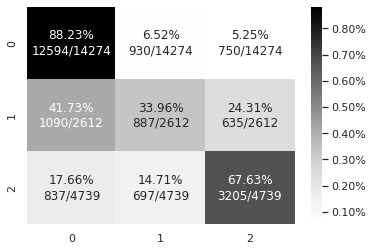

In [103]:
#Visualizing the confusion matrix for each classifier

#fig, axes = plt.subplots(ncols=1, sharex=True, sharey=True, figsize = (10,5))


cm, annot = cm_analysis(y_test, base_model.predict(X_test), "teste", base_model.classes_, base_model.classes_)
plt.figure(i)
sns.heatmap(cm, annot=annot, fmt='', xticklabels=base_model.classes_, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=base_model.classes_, cmap="Greys")
#axes[0].set_title(f'Confusion matrix for {base_model.__class__.__name__}')
#axes[0].set_ylabel('True label')
#axes[0].set_xlabel('Predicted label')
    
#fig.tight_layout()

Matriz de Confusão de todos os modelos sem balanceamento

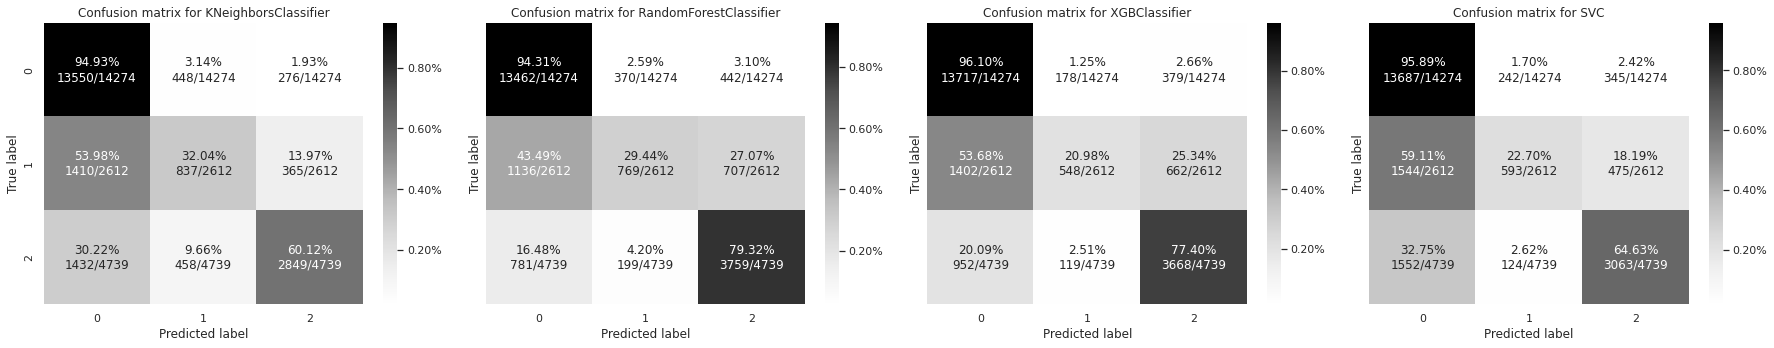

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [104]:
#Visualizing the confusion matrix for each classifier

fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize = (25,5))

for i,model in enumerate([clf_std_knn, clf_std_rf, clf_std_xgb, clf_std_svm]):
    cm, annot = cm_analysis(y_test, model.predict(X_test), "teste", model.classes_, model.classes_)

    plt.figure(i)
    sns.heatmap(cm, annot=annot, fmt='', xticklabels=model.classes_, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=model.classes_, cmap="Greys", ax=axes[i])
    axes[i].set_title(f'Confusion matrix for {model.__class__.__name__}')
    axes[i].set_ylabel('True label')
    axes[i].set_xlabel('Predicted label')
    
fig.tight_layout()

Matriz de Confusão de todos os modelos com balanceamento (COST)

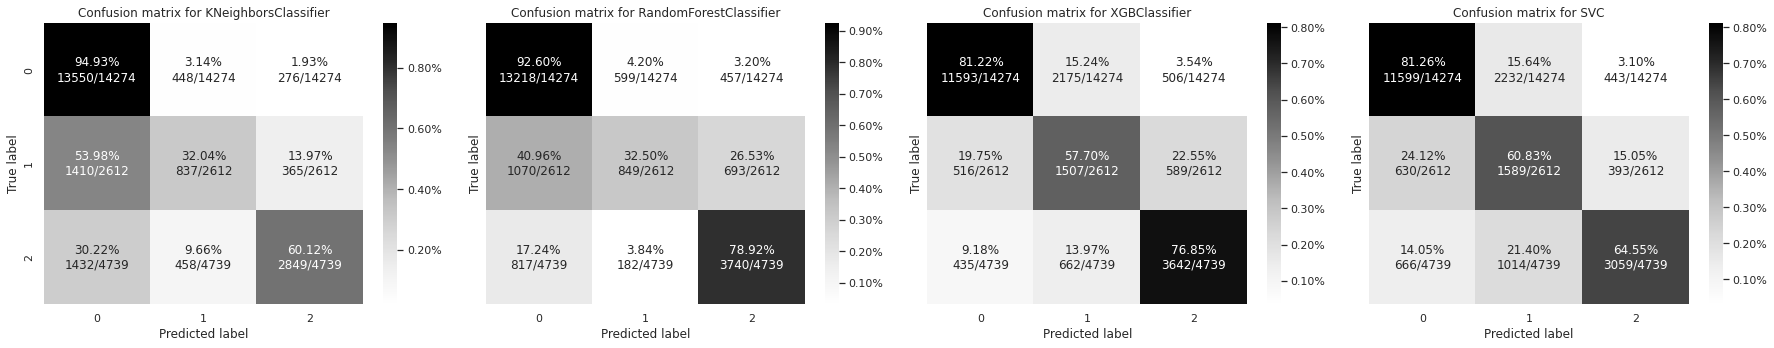

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [105]:
#Visualizing the confusion matrix for each classifier

fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize = (25,5))

for i,model in enumerate([clf_knn, clf_rf, clf_xgb, clf_svm]):
    cm, annot = cm_analysis(y_test, model.predict(X_test), "teste", model.classes_, model.classes_)

    plt.figure(i)
    sns.heatmap(cm, annot=annot, fmt='', xticklabels=model.classes_, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=model.classes_, cmap="Greys", ax=axes[i])
    axes[i].set_title(f'Confusion matrix for {model.__class__.__name__}')
    axes[i].set_ylabel('True label')
    axes[i].set_xlabel('Predicted label')
    
fig.tight_layout()

Matriz de Confusão de todos os modelos com balanceamento via sampling

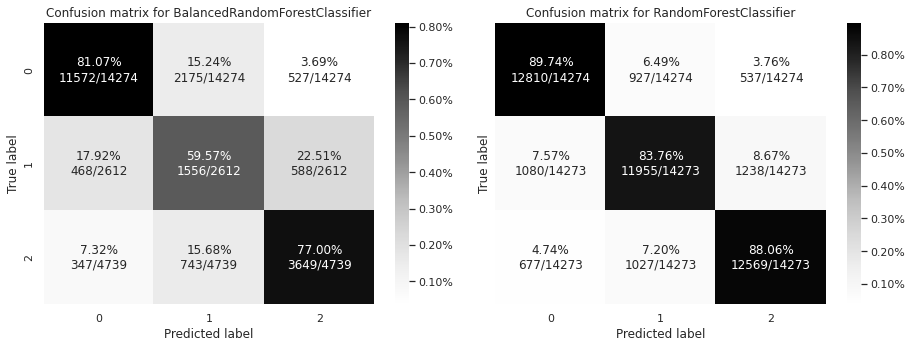

<Figure size 432x288 with 0 Axes>

In [106]:
#Visualizing the confusion matrix for each classifier
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize = (13,5))

for i,model in enumerate([clf_balanced_rf, clf_smote_rf]):
    if i == 1:
      cm, annot = cm_analysis(over_y_test, model.predict(over_X_test), "teste", model.classes_, model.classes_)
    else:  
      cm, annot = cm_analysis(y_test, model.predict(X_test), "teste", model.classes_, model.classes_)

    plt.figure(i)
    sns.heatmap(cm, annot=annot, fmt='', xticklabels=model.classes_, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=model.classes_, cmap="Greys", ax=axes[i])
    axes[i].set_title(f'Confusion matrix for {model.__class__.__name__}')
    axes[i].set_ylabel('True label')
    axes[i].set_xlabel('Predicted label')
    
fig.tight_layout()

Comparando a Matriz de Confusão dos dois melhores modelos

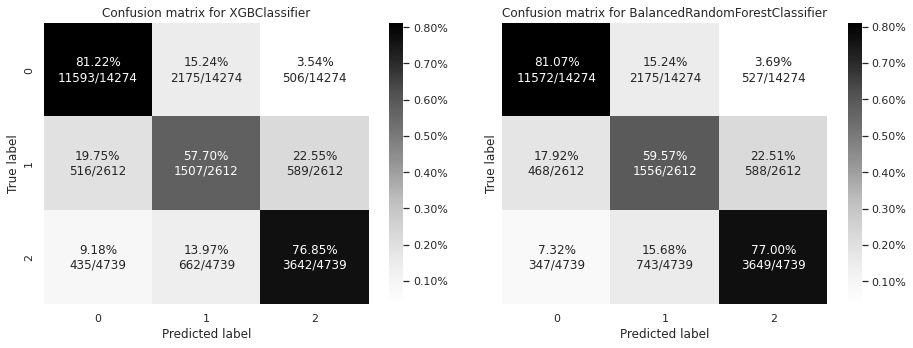

<Figure size 432x288 with 0 Axes>

In [107]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize = (13,5))

for i,model in enumerate([clf_xgb, clf_balanced_rf]):
    cm, annot = cm_analysis(y_test, model.predict(X_test), "teste", model.classes_, model.classes_)

    plt.figure(i)
    sns.heatmap(cm, annot=annot, fmt='', xticklabels=model.classes_, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=model.classes_, cmap="Greys", ax=axes[i])
    axes[i].set_title(f'Confusion matrix for {model.__class__.__name__}')
    axes[i].set_ylabel('True label')
    axes[i].set_xlabel('Predicted label')
    
fig.tight_layout()

# **Etapa 4 - Perform Hyperparameter Tuning**

Otimização de Parametros para o BalancedRandomForest

### Random Search

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

estimator = BalancedRandomForestClassifier(random_state = 101)

# Define the search space
param_grid = { 
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,10,50],
    'criterion' :['gini', 'entropy'],
    'n_estimators': [50, 100, 200, 400, 600],
}

# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

# Define random search
random_search = RandomizedSearchCV(estimator=estimator, 
                           param_distributions=param_grid, 
                           n_iter=30,
                           scoring='balanced_accuracy',  
                           n_jobs=-1, 
                           cv=kfold,
                           random_state=48,
                           verbose=1)

random_result = random_search.fit(X_train, y_train)

# picking the best model
best_model_balanced_rf = random_search.best_estimator_

# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
#print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')

Fitting 2 folds for each of 30 candidates, totalling 60 fits
The best score is 0.7224
The best hyperparameters are {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini'}


### Grid Search

In [93]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold

#estimator = BalancedRandomForestClassifier(random_state = 101)

# Define the search space
#param_grid = { 
#    'min_samples_leaf': [1, 2, 4],
#   'min_samples_split': [2, 5, 10],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [4,5,10,50],
#    'criterion' :['gini', 'entropy'],
#    'n_estimators': [50, 100, 200, 400, 600],
#}

# Set up the k-fold cross-validation
#kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

#com = 1
#for x in param_grid.values():
#    com *= len(x)
#print('There are {} combinations'.format(com))

#print('This would take {:.0f} years to finish.'.format((100 * com) / (60 * 60 * 24 * 365)))

# Define random search
#random_search = GridSearchCV(estimator=estimator, 
#                           param_grid=param_grid, 
#                           scoring='balanced_accuracy',  
#                          n_jobs=-1, 
#                          cv=kfold,
#                           verbose=3)

#random_result = random_search.fit(X_train, y_train)

# picking the best model
#best_model_balanced_rf_grid = random_search.best_estimator_

# Print the best score and the corresponding hyperparameters
#print(f'The best score is {random_result.best_score_:.4f}')
#print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
#print(f'The best hyperparameters are {random_result.best_params_}')

# **Etapa 5 - Evaluate the Best Model**

In [114]:
# Make predictions using the unoptimized and model
results = {}
index = 0

for clf in [clf_balanced_rf, best_model_balanced_rf]:
   clf_name = clf.__class__.__name__
   results[clf_name +  str(index)] = train_predict(clf, X_train, y_train, X_test, y_test)
   index += 1;

#Printing out the values
pd.DataFrame.from_dict(results)

BalancedRandomForestClassifier trained on 50456 samples.
BalancedRandomForestClassifier trained on 50456 samples.


,BalancedRandomForestClassifier0,BalancedRandomForestClassifier1
train_time,5.395328,12.429172
pred_time,0.591691,0.985684
weighted_precision,0.826503,0.828651
weighted_recall,0.775815,0.781642
balanced_accuracy_score,0.725470,0.730473
gmean,0.832726,0.836655
weighted_roc_auc,0.894833,0.900882
macro_f_test,0.684235,0.688999
weighted_f_test,0.812261,0.815465


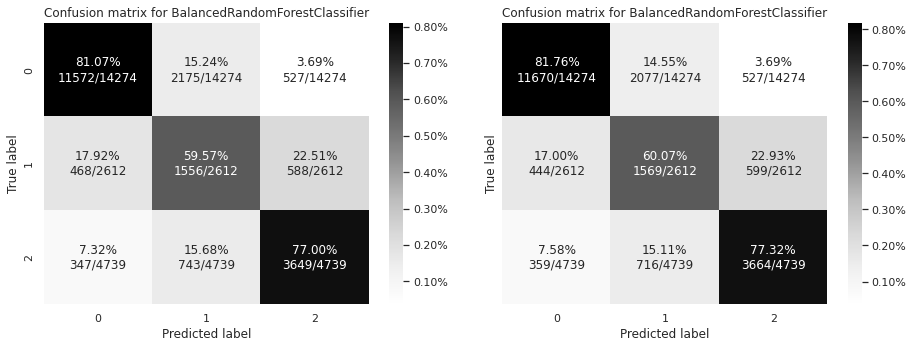

<Figure size 432x288 with 0 Axes>

In [115]:
# Compare Otimezed and Not Optimazed Models
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize = (13,5))

for i,model in enumerate([clf_balanced_rf, best_model_balanced_rf]):
    cm, annot = cm_analysis(y_test, model.predict(X_test), "teste", model.classes_, model.classes_)

    plt.figure(i)
    sns.heatmap(cm, annot=annot, fmt='', xticklabels=model.classes_, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=model.classes_, cmap="Greys", ax=axes[i]) 
    axes[i].set_title(f'Confusion matrix for {model.__class__.__name__}')
    axes[i].set_ylabel('True label')
    axes[i].set_xlabel('Predicted label')
fig.tight_layout()

# **Etapa 6 - Interpret The Model Results**

## Feature Importance

In [116]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': best_model_balanced_rf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
4,Emergency,1.221890e-01
13,Antibiotics,1.198730e-01
18,Different_Drugs,9.000922e-02
23,Creatinina,7.418708e-02
24,Eosinófilos,6.244279e-02
21,Leucócitos,6.177474e-02
22,Plaquetas,6.139083e-02
25,Potássio,5.369809e-02
3,Obstetrics,4.586473e-02
20,Complications,3.689613e-02


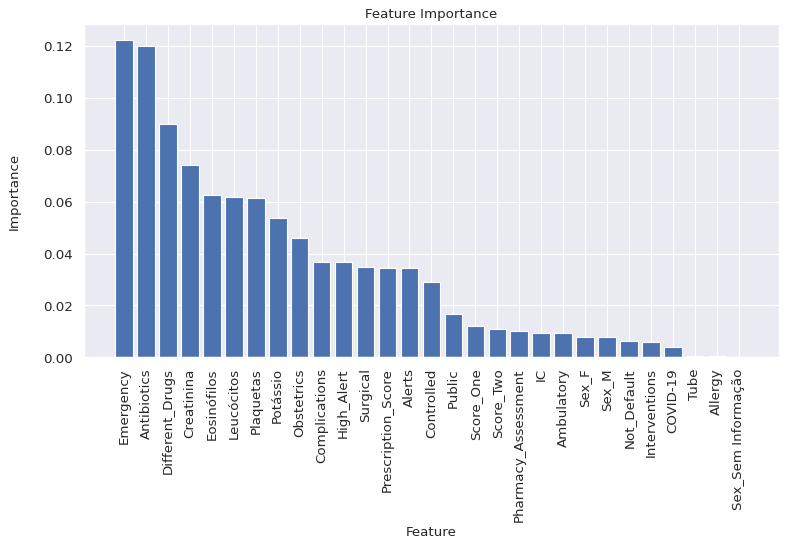

In [117]:
# Extract the feature importances
importance = best_model_balanced_rf.feature_importances_

sorted_indices = np.argsort(importance)[::-1]

feat_labels = features.columns

# Creat the plot
figure(figsize=(10, 7), dpi=80)
plt.title('Feature Importance', fontsize=12)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', labelpad=20, fontsize=12)
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

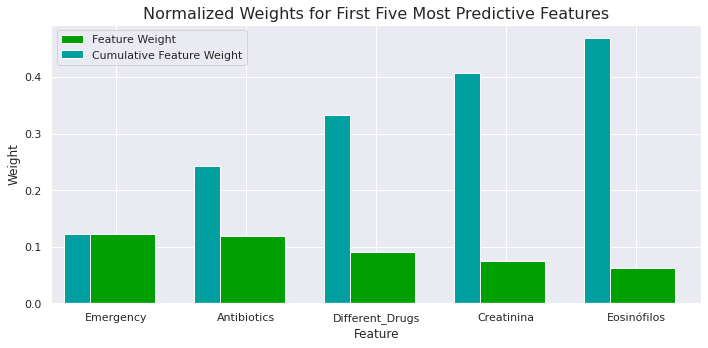

In [118]:
# Extract the feature importances
importances = best_model_balanced_rf.feature_importances_

# Display the five most important features
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]

# Creat the plot
fig = plt.figure(figsize = (10,5))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', label = "Feature Weight")
plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', 
        label = "Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show() 

## Permutation Importance

In [119]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.2 MB/s 
     |████████████████████████████████| 133 kB 53.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=193570fd861500ab273dd2594ecd9c2193bafe5fe8f13f8deb91ffa5037a0baf
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [120]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model_balanced_rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1787 ± 0.0023,Emergency
0.0775 ± 0.0023,Surgical
0.0294 ± 0.0031,Creatinina
0.0278 ± 0.0020,Different_Drugs
0.0235 ± 0.0008,Plaquetas
0.0221 ± 0.0030,Antibiotics
0.0199 ± 0.0009,Potássio
0.0188 ± 0.0015,Complications
0.0185 ± 0.0012,Leucócitos
0.0164 ± 0.0019,Eosinófilos


## Box Plot

Com o box plot podemos analisar se as variaveis que possuem mais peso no features_importance_ conseguem separar bem os dados em cada classe.

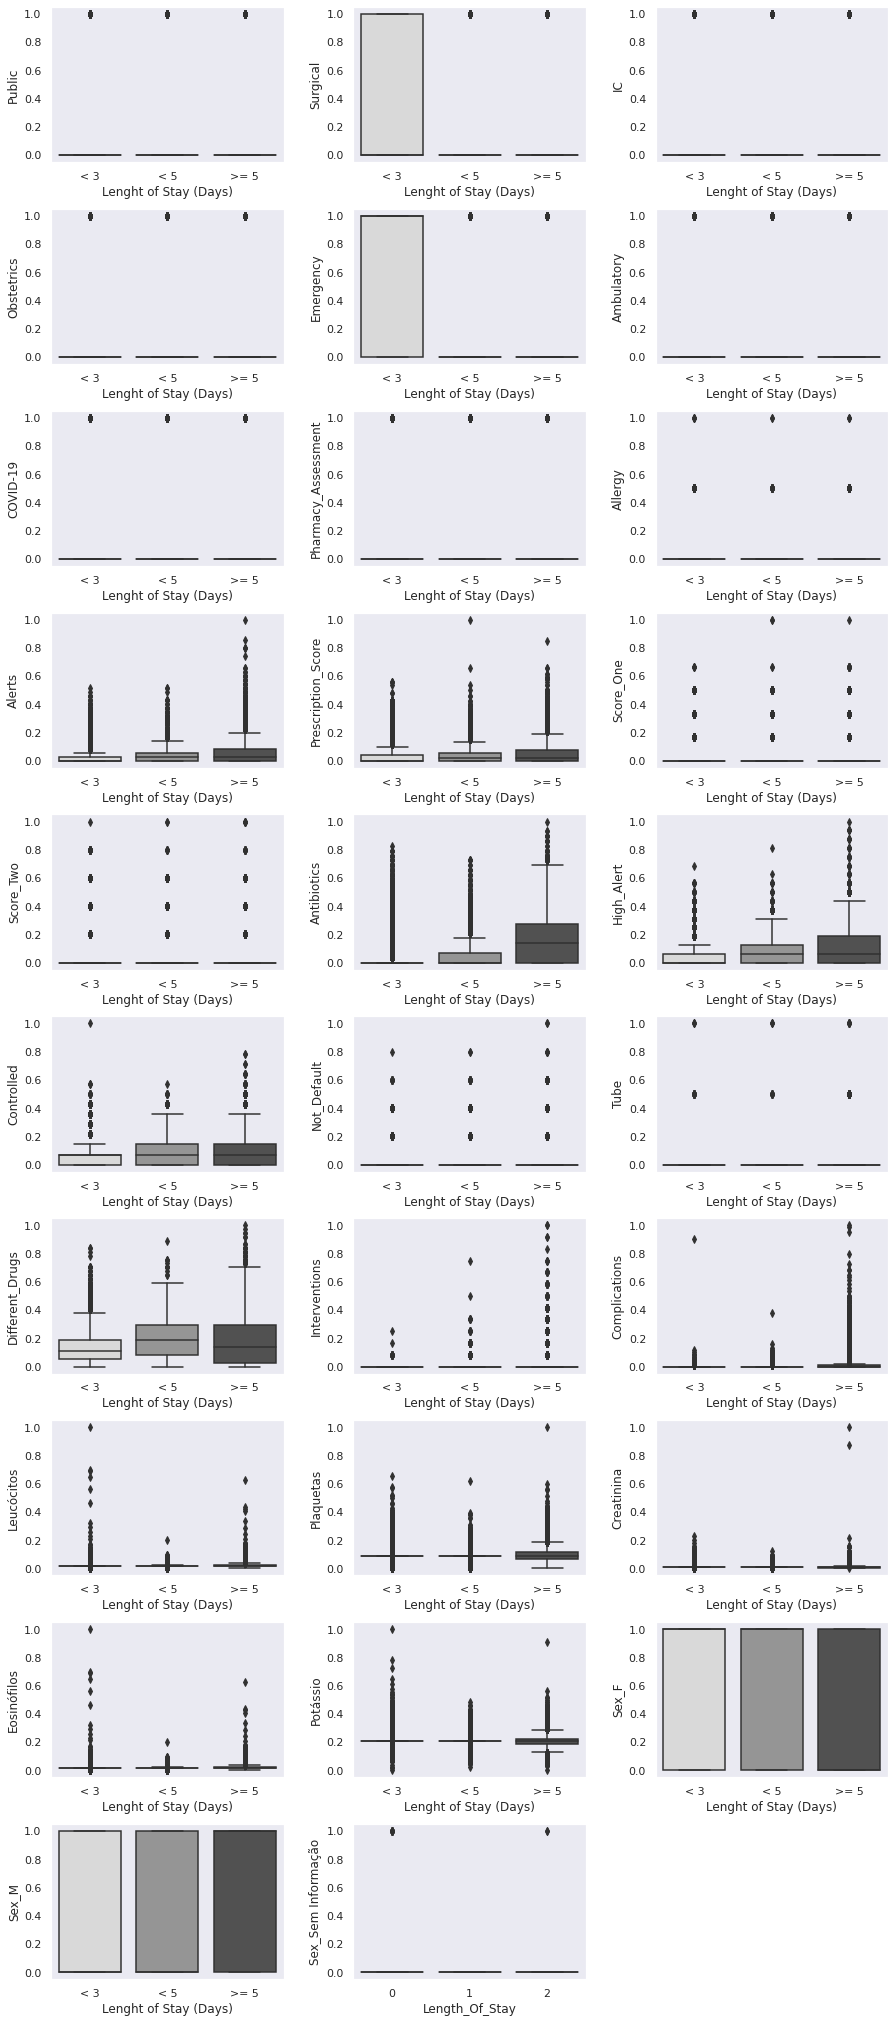

In [121]:
sns.set_style('dark')
fig = plt.figure(figsize= (15,40))
fig.subplots_adjust(hspace = 0.30, wspace = 0.30)
k=0
for i in range(1,len(admission_dataset.columns)+1):
    ax = fig.add_subplot(11,3,i)
    sns.boxplot(x = 'Length_Of_Stay', 
                y = features.columns[k], 
                data = admission_dataset, 
                palette = 'Greys')
    k = k + 1
    if k == len(features.columns): break
    plt.xticks([0, 1, 2], ['< 3', '< 5', '>= 5'])
    ax.set_xlabel('Lenght of Stay (Days)')
plt.show()

## SHAP

Nessa fase, será realizada uma análise de SHAP (Essa parte demora em torno de 20 minutos para rodar)

In [ ]:
# Install shap lib
pip install shap

In [ ]:
import shap

# Create explainer
explainer = shap.TreeExplainer(best_model_balanced_rf, X_test[:2000])

In [ ]:
# Run shap analysis
shap_values = explainer.shap_values(X_test[:2000], check_additivity=False)

# Plot shap values analysis
shap.summary_plot(shap_values, feature_names = X_train.columns, max_display= 10, class_names=['< 3', '< 5', '>= 5'])